In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

In [2]:
rating = pd.read_csv('rating.csv.zip')
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [3]:
anime = pd.read_csv('anime.csv')
anime = anime[['anime_id','name','genre','type']]
anime

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA
12290,5543,Under World,Hentai,OVA
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA


In [4]:
rating = rating[rating['rating'] > 0]

In [5]:
rating

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [6]:
rating.groupby('anime_id')['rating'].mean()

anime_id
1        8.869433
5        8.439724
6        8.419393
7        7.533426
8        7.198052
           ...   
34324    5.909091
34325    7.333333
34349    7.000000
34367    5.250000
34475    6.666667
Name: rating, Length: 9927, dtype: float64

In [7]:
rating.groupby('anime_id')['rating'].count()

anime_id
1        13449
5         5790
6         9385
7         2169
8          308
         ...  
34324       11
34325       15
34349        3
34367        4
34475        3
Name: rating, Length: 9927, dtype: int64

In [8]:
anime = pd.merge(anime , pd.DataFrame(rating.groupby('anime_id')['rating'].mean().round(2)) , on='anime_id')

In [9]:
anime = pd.merge(anime , pd.DataFrame(rating.groupby('anime_id')['rating'].count()) , on='anime_id')

In [10]:
anime = anime.rename(columns={'rating_x' : 'rating' , 'rating_y' : 'vote'})

In [11]:
anime

,anime_id,name,genre,type,rating,vote
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.43,1961
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.32,21494
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.45,1188
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,9.26,17151
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.27,3115
...,...,...,...,...,...,...
9921,5541,The Satisfaction,Hentai,OVA,1.00,2
9922,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,4.00,2
9923,5543,Under World,Hentai,OVA,2.50,2
9924,5621,Violence Gekiga David no Hoshi,Hentai,OVA,6.00,1


In [12]:
plt.style.use('seaborn')

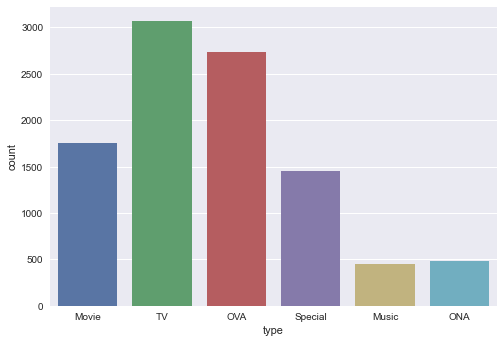

In [13]:
sns.countplot(data=anime , x='type');

In [14]:
genres20 = pd.DataFrame(anime['genre'].str.get_dummies(',').sum().sort_values(ascending=False)[:20])

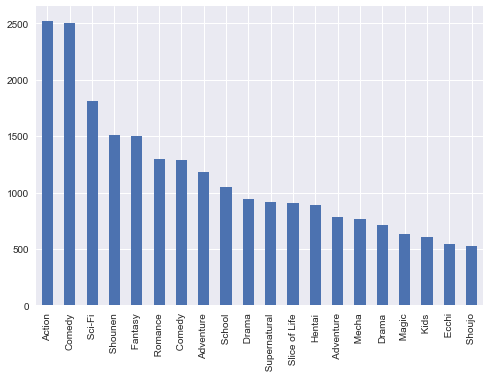

In [15]:
genres20.plot(kind='bar' , legend=False);

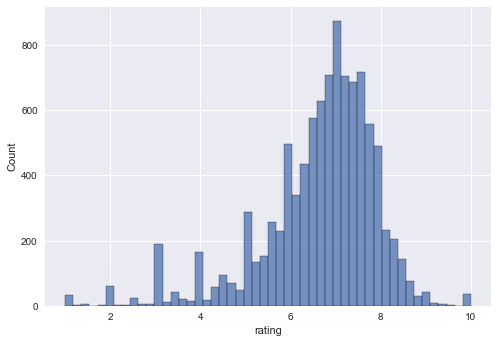

In [16]:
sns.histplot(anime['rating'] , bins=50);

In [17]:
c = anime['rating'].mean()
m = anime['vote'].quantile(0.95)
v = anime['vote']
r = anime['rating']

In [18]:
anime['score'] = (v/(v+m) * r) + (m/(v+m) * c)

In [19]:
anime.sort_values('score' , ascending=False)[:10]

,anime_id,name,genre,type,rating,vote,score
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.32,21494,8.958478
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,9.26,17151,8.831686
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,9.06,21124,8.728585
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,9.17,15518,8.720585
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,8.93,24126,8.650641
39,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,8.83,34226,8.634644
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,8.92,19481,8.585267
29,2001,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi",TV,8.93,16955,8.551972
82,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,8.73,25290,8.485378
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,9.23,7477,8.428202


In [20]:
rating_anime = pd.merge(rating , anime[['anime_id' , 'name']] , on='anime_id')

In [21]:
matx_anime = rating_anime.pivot_table(index='name' , columns='user_id' , values='rating' , fill_value=0)
matx_anime

user_id,1,2,3,5,7,8,9,10,11,12,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
&quot;Bungaku Shoujo&quot; Memoire,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,0,0,0
&quot;Bungaku Shoujo&quot; Movie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xxxHOLiC Kei,0,0,0,0,0,0,0,0,0,0,...,9,0,0,0,0,0,0,0,0,0
xxxHOLiC Movie: Manatsu no Yoru no Yume,0,0,0,0,0,0,0,0,0,0,...,9,0,0,0,0,0,0,0,0,0
xxxHOLiC Rou,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### cosine similarity

In [22]:
cosin_sim = cosine_similarity(matx_anime)

In [23]:
def cosin_recommend(anime_name , top):
    anime_index = matx_anime.reset_index()[matx_anime.reset_index()['name'] == anime_name].index.values[0]    
    silimar_anime = list(enumerate(cosin_sim[anime_index]))    
    silimar_anime_sort = sorted(silimar_anime , key=lambda x : x[1] , reverse=True)
    
    lis_name = []
    lis_cosin = []
    for i , s in silimar_anime_sort[1:top+1] :
        lis_name.append(matx_anime.reset_index()[matx_anime.reset_index().index == i]['name'].values[0])
        lis_cosin.append(s)
    result = pd.DataFrame(lis_name , lis_cosin).reset_index()
    result.columns = ['corr' , 'anime']
    
    return result

In [24]:
cosin_recommend('Death Note' , 10)

,corr,anime
0,0.619842,Code Geass: Hangyaku no Lelouch
1,0.592260,Code Geass: Hangyaku no Lelouch R2
2,0.583024,Elfen Lied
3,0.574731,Shingeki no Kyojin
4,0.565031,Fullmetal Alchemist: Brotherhood
5,0.551848,Naruto
6,0.551835,Fullmetal Alchemist
7,0.539531,Sword Art Online
8,0.518205,Angel Beats!
9,0.516551,Mirai Nikki (TV)


In [25]:
cosin_recommend('Fullmetal Alchemist' , 10)

,corr,anime
0,0.622155,Fullmetal Alchemist: The Conqueror of Shamballa
1,0.578895,Fullmetal Alchemist: Brotherhood
2,0.551835,Death Note
3,0.525490,Code Geass: Hangyaku no Lelouch
4,0.498003,Code Geass: Hangyaku no Lelouch R2
5,0.484621,Elfen Lied
6,0.477675,Naruto
7,0.471489,Soul Eater
8,0.457816,Tengen Toppa Gurren Lagann
9,0.444942,Cowboy Bebop


### Nearest Neighbors

In [26]:
model = NearestNeighbors(metric='cosine' , algorithm='brute') 
model.fit(matx_anime)

NearestNeighbors(algorithm='brute', metric='cosine')

In [27]:
def nearest_recommend(anime_name , top):
    anime_array = matx_anime.loc[anime_name].values.reshape(1,-1)
    distance , indices = model.kneighbors(anime_array , n_neighbors=top+1)
    
    lis_name = []
    lis_distance = []
    for i in range(1 , top+1):
        lis_name.append(matx_anime.index[indices.flatten()[i]])
        lis_distance.append(distance.flatten()[i])
    anime_sim = pd.DataFrame(lis_name , lis_distance).reset_index()
    anime_sim.columns = ['distance' , 'anime']
    
    return anime_sim

In [28]:
nearest_recommend('Death Note' , 10)

,distance,anime
0,0.380158,Code Geass: Hangyaku no Lelouch
1,0.407740,Code Geass: Hangyaku no Lelouch R2
2,0.416976,Elfen Lied
3,0.425269,Shingeki no Kyojin
4,0.434969,Fullmetal Alchemist: Brotherhood
5,0.448152,Naruto
6,0.448165,Fullmetal Alchemist
7,0.460469,Sword Art Online
8,0.481795,Angel Beats!
9,0.483449,Mirai Nikki (TV)


In [29]:
nearest_recommend('Dragon Ball Z' , 10)

,distance,anime
0,0.238329,Dragon Ball
1,0.275710,Dragon Ball GT
2,0.542592,Naruto
3,0.552113,Death Note
4,0.568560,"Dragon Ball Z Movie 08: Moetsukiro!! Nessen, R..."
5,0.586292,Fullmetal Alchemist
6,0.588079,Dragon Ball Z Movie 05: Tobikkiri no Saikyou t...
7,0.593610,Dragon Ball Z Movie 03: Chikyuu Marugoto Chouk...
8,0.594549,Dragon Ball Z Movie 01: Ora no Gohan wo Kaese!!
9,0.598206,Dragon Ball Z Movie 06: Gekitotsu!! 100-oku Po...
